In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Visualise the data (and read it)

In [ ]:
df = pd.read_csv("/content/deceptive-opinion.csv")

In [ ]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


# Preprocessing the data

In [ ]:
df['text'] = df['text'].str.lower().str.replace('[^\w\s]', '')

In [ ]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,this comes a little late as i'm finally catchi...
3,truthful,omni,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,amalfi,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,palmer,negative,MTurk,"the palmer house hilton, while it looks good i..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['deceptive'], test_size=0.2, random_state=42)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # You can tune max_features
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training the models

## model 1 Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Train SVM
svm = SVC()
svm.fit(X_train_tfidf, y_train)

SVC()

In [ ]:
y_pred_svm = svm.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.875
              precision    recall  f1-score   support

   deceptive       0.85      0.89      0.87       152
    truthful       0.90      0.86      0.88       168

    accuracy                           0.88       320
   macro avg       0.87      0.88      0.87       320
weighted avg       0.88      0.88      0.88       320



In [ ]:
acc_SVM = accuracy_score(y_test, y_pred_svm)
print(acc_SVM)

0.875


## model 2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.66875
              precision    recall  f1-score   support

   deceptive       0.64      0.69      0.66       152
    truthful       0.70      0.65      0.67       168

    accuracy                           0.67       320
   macro avg       0.67      0.67      0.67       320
weighted avg       0.67      0.67      0.67       320



In [ ]:
acc_DT = accuracy_score(y_test, y_pred_dt)
print(acc_DT)

0.66875


## model 3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.86875
              precision    recall  f1-score   support

   deceptive       0.83      0.91      0.87       152
    truthful       0.91      0.83      0.87       168

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320



In [ ]:
acc_RF = accuracy_score(y_test, y_pred_rf)
print(acc_RF)

0.86875


## model 4 Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.878125
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.85      0.90      0.88       152
    truthful       0.91      0.86      0.88       168

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



In [ ]:
acc_LR = accuracy_score(y_test, y_pred)
print(acc_LR)

0.878125


## model 5 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.703125
              precision    recall  f1-score   support

   deceptive       0.64      0.86      0.73       152
    truthful       0.82      0.56      0.66       168

    accuracy                           0.70       320
   macro avg       0.73      0.71      0.70       320
weighted avg       0.73      0.70      0.70       320



In [ ]:
acc_KNN = accuracy_score(y_test, y_pred_knn)
print(acc_KNN)

0.703125


space.

# Optimising the models using GA

In [ ]:
import numpy as np

In [ ]:
# def fitness_function(individual):
#     model_type = int(individual[0])
#     params = individual[1:]

#     if model_type == 0:  # SVM
#         model = SVC(C=params[0], kernel='rbf', gamma=max(0.1,params[1]))
#     elif model_type == 1:  # Decision Tree
#         model = DecisionTreeClassifier(max_depth=int(params[0]))
#     elif model_type == 2:  # Random Forest
#         model = RandomForestClassifier(n_estimators=int(params[0]), max_depth=int(params[1]))
#     elif model_type == 3:  # Logistic Regression
#         model = LogisticRegression(C=params[0], solver='liblinear')
#     elif model_type == 4:  # KNN
#         model = KNeighborsClassifier(n_neighbors=int(params[0]))
#     else:
#         return 0  # Invalid model type

#     model.fit(X_train_tfidf, y_train)
#     predictions = model.predict(X_test_tfidf)
#     return accuracy_score(y_test, predictions)

# # GA parameters
# population_size = 10
# generations = 5
# mutation_rate = 0.2
# model_count = 5

# # Initialize population (randomly select models and parameters)
# population = []
# for _ in range(population_size):
#     model_type = np.random.randint(0, model_count)
#     if model_type == 0:  # SVM
#         individual = [model_type, np.random.uniform(0.1, 10), np.random.uniform(0.001, 1)]
#     elif model_type == 1:  # Decision Tree
#         individual = [model_type, np.random.randint(1, 20)]
#     elif model_type == 2:  # Random Forest
#         individual = [model_type, np.random.randint(10, 100), np.random.randint(1, 20)]
#     elif model_type == 3:  # Logistic Regression
#         individual = [model_type, np.random.uniform(0.1, 10)]
#     elif model_type == 4:  # KNN
#         individual = [model_type, np.random.randint(1, 20)]
#     population.append(individual)

# # Run GA
# for generation in range(generations):
#     print(f"Generation {generation + 1}")
#     fitness_scores = [fitness_function(ind) for ind in population]
#     print(f"Fitness scores: {fitness_scores}")

#     # Select the top individuals
#     sorted_indices = np.argsort(fitness_scores)[::-1]
#     population = [population[i] for i in sorted_indices]
#     top_individuals = population[:population_size // 2]

#     # Crossover
#     offspring = []
#     for _ in range(population_size // 2):
#         parent1 = top_individuals[np.random.randint(len(top_individuals))]
#         parent2 = top_individuals[np.random.randint(len(top_individuals))]
#         child = [(p1 + p2) / 2 for p1, p2 in zip(parent1, parent2)]
#         offspring.append(child)

#     # Mutation
#     for child in offspring:
#         if np.random.rand() < mutation_rate:
#             child[np.random.randint(1, len(child))] += np.random.uniform(-1, 1)

#     # Create new population
#     population = top_individuals + offspring


In [ ]:
# # Final result
# for i in range(5):
#   best_individual = population[i]
#   print(f"Best model type: {int(best_individual[0])}")
#   print(f"Best parameters: {best_individual[1:]}")

In [ ]:
!pip install deap

In [ ]:
from deap import base, creator, tools, algorithms

## SVM GA

In [ ]:
# Define fitness function for SVM
def fitness_function_svm(params):
    model = SVC(C=max(0.1, params[0]), kernel='rbf', gamma=max(0.1,params[1]))  # Assuming 'rbf' kernel for SVM
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    return accuracy_score(y_test, predictions),  # Return as a tuple for DEAP


# GA for SVM
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", lambda: random.uniform(0.1, 10))
toolbox.register("attr_int", lambda: random.randint(1, 20))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("evaluate", fitness_function_svm)  # Now fitness_function_svm is defined
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


population = toolbox.population(n=20)
result, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	20    
1  	14    
2  	17    
3  	18    
4  	15    
5  	13    
6  	15    
7  	16    
8  	18    
9  	11    
10 	12    


In [ ]:
# Best individual for SVM
best_ind = tools.selBest(result, k=1)[0]
print("Best Parameters for SVM:", best_ind)
print("Best Accuracy for SVM:", fitness_function_svm(best_ind)[0])

Best Parameters for SVM: [4.960015459424765, 0.8794500138317453]
Best Accuracy for SVM: 0.88125


In [ ]:
acc_SVM_GA = fitness_function_svm(best_ind)[0]
print(acc_SVM_GA)

0.88125


## DT GA (need to fix)

In [ ]:
# Define fitness function for Decision Tree
def fitness_function_dt(params):
    model = DecisionTreeClassifier(max_depth=int(max(1, params[0])))
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    return accuracy_score(y_test, predictions),

# GA setup for Decision Tree
creator.create("FitnessMax_DT", base.Fitness, weights=(1.0,))
creator.create("Individual_DT", list, fitness=creator.FitnessMax_DT)

# Use attr_int to initialize an integer for max_depth
toolbox.register("attr_int", lambda: random.randint(1, 20))
toolbox.register("individual", tools.initRepeat, creator.Individual_DT, toolbox.attr_int, 1)
toolbox.register("evaluate", fitness_function_dt)

# Use cxUniform for single-gene individuals
toolbox.register("mate", tools.cxUniform, indpb=0.5)  # indpb is probability of gene swapping

# Mutate with a wider range and higher probability to ensure more diversity
toolbox.register("mutate", tools.mutUniformInt, low=1, up=50, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


population = toolbox.population(n=20)  # Population size
result, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax_DT' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual_DT' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	20    
1  	9     
2  	9     
3  	11    
4  	9     
5  	15    
6  	13    
7  	15    
8  	9     
9  	10    
10 	12    


In [ ]:
# Best individual for Decision Tree
best_ind = tools.selBest(result, k=1)[0]
print("Best Parameters for Decision Tree:", best_ind)
print("Best Accuracy for Decision Tree:", fitness_function_dt(best_ind)[0])

Best Parameters for Decision Tree: [2]
Best Accuracy for Decision Tree: 0.709375


In [ ]:
acc_DT_GA = fitness_function_dt(best_ind)[0]
print(acc_DT_GA)

0.709375


## RF GA

In [ ]:
# Fitness function for Random Forest
def fitness_function_rf(params):
    n_estimators = int(max(10, params[0]))
    max_depth = None if params[1] <= 0 else int(max(1, params[1]))
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    return accuracy_score(y_test, predictions),

if not hasattr(creator, "FitnessMax"):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", lambda: random.randint(10, 200))
toolbox.register("attr_float", lambda: random.uniform(-10, 50))
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_float), n=1)
toolbox.register("evaluate", fitness_function_rf)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=10, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

population = toolbox.population(n=20)
result, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.3, ngen=20, verbose=True)

gen	nevals
0  	20    
1  	15    
2  	11    
3  	14    
4  	10    
5  	13    
6  	12    
7  	15    
8  	18    
9  	13    
10 	16    
11 	10    
12 	17    
13 	10    
14 	16    
15 	10    
16 	8     
17 	9     
18 	11    
19 	12    
20 	17    


In [ ]:
# Best individual for Random Forest
best_ind = tools.selBest(result, k=1)[0]
print("Best Parameters for Random Forest:", best_ind)
print("Best Accuracy for Random Forest:", fitness_function_rf(best_ind)[0])
acc_RF_GA = fitness_function_rf(best_ind)[0]
print(acc_RF_GA)

Best Parameters for Random Forest: [183.3711584025886, 34.73341489132106]
Best Accuracy for Random Forest: 0.878125
0.865625


## LR GA (need to fix)

In [ ]:
from deap import creator
def fitness_function_lr(params):
    # Ensure C is within the defined bounds
    C_value = max(0.1, min(params[0], 10))
    model = LogisticRegression(C=C_value, penalty='l2', solver='liblinear', max_iter=100)
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    return accuracy_score(y_test, predictions),

if "FitnessMax_R" not in creator.__dict__:
    creator.create("FitnessMax_R", base.Fitness, weights=(1.0,))
if "Individual_R" not in creator.__dict__:
    creator.create("Individual_R", list, fitness=creator.FitnessMax_R)

toolbox = base.Toolbox()
toolbox.register("attr_float", lambda: random.uniform(0.1, 10))  # C parameter
toolbox.register("individual", tools.initRepeat, creator.Individual_R, toolbox.attr_float, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function_lr)
toolbox.register("mate", tools.cxBlend, alpha=0.5) # Changed to cxBlend
toolbox.register("mutate", tools.mutGaussian, mu=5, sigma=2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Execute GA for Logistic Regression
population = toolbox.population(n=20)  # Population size
result, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

gen	nevals
0  	20    
1  	11    
2  	10    
3  	13    
4  	12    
5  	15    
6  	11    
7  	13    
8  	11    
9  	11    
10 	15    


In [ ]:
# Display Best Individual and Accuracy
best_ind = tools.selBest(result, k=1)[0]
print("Best Parameters for Logistic Regression:", best_ind)
print("Best Accuracy for Logistic Regression:", fitness_function_lr(best_ind)[0])

Best Parameters for Logistic Regression: [1.2512950935815952]
Best Accuracy for Logistic Regression: 0.878125


In [ ]:
acc_LR_GA = fitness_function_lr(best_ind)[0]
print(acc_LR_GA)

0.878125


## KNN GA (need to fix)

In [ ]:
# Define fitness function for KNN
def fitness_function_knn(params):
    model = KNeighborsClassifier(n_neighbors=max(1, int(params[0])), weights='uniform', algorithm='auto')
    model.fit(X_train_tfidf, y_train)
    predictions = model.predict(X_test_tfidf)
    return accuracy_score(y_test, predictions),

# GA Setup for KNN
# Define unique class names for KNN
creator.create("FitnessMax_KNN", base.Fitness, weights=(1.0,))
creator.create("Individual_KNN", list, fitness=creator.FitnessMax_KNN)

toolbox = base.Toolbox()
toolbox.register("attr_int", lambda: random.randint(1, 20))  # Number of neighbors
toolbox.register("individual", tools.initRepeat, creator.Individual_KNN, toolbox.attr_int, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function_knn)
toolbox.register("mate", tools.cxUniform, indpb=0.5)  # indpb: probability of gene swapping
toolbox.register("mutate", tools.mutGaussian, mu=10, sigma=3, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


# Execute GA for KNN
population = toolbox.population(n=20)  # Population size
result, _ = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

gen	nevals
0  	20    
1  	15    
2  	11    
3  	11    
4  	13    
5  	13    
6  	14    
7  	9     
8  	13    
9  	13    
10 	14    


In [ ]:
# Display Best Individual and Accuracy
best_ind = tools.selBest(result, k=1)[0]
print("Best Parameters for KNN:", best_ind)
print("Best Accuracy for KNN:", fitness_function_knn(best_ind)[0])

Best Parameters for KNN: [19]
Best Accuracy for KNN: 0.7875


In [ ]:
acc_KNN_GA = fitness_function_knn(best_ind)[0]
print(acc_KNN_GA)

0.7875


#

In [ ]:


# # Fitness Function
# def fitness_function(params):
#     model_type = int(params[0])  # First parameter indicates model type
#     if model_type == 0:  # Logistic Regression
#         model = LogisticRegression(C=max(0.1, params[1]), max_iter=int(params[2]))
#     elif model_type == 1:  # SVM
#         model = SVC(C=max(0.1, params[1]), kernel='linear' if params[2] < 0.5 else 'rbf')
#     elif model_type == 2:  # Random Forest
#         model = RandomForestClassifier(n_estimators=max(1, int(params[0])), max_depth= None if params[1] <= 0 else max(1, int(params[1])))
#     elif model_type == 3:  # KNN
#         model = KNeighborsClassifier(n_neighbors=max(1, int(params[1])))
#     else:
#         return 0,  # Invalid model type

#     # Train the model
#     model.fit(X_train_tfidf, y_train)
#     predictions = model.predict(X_test_tfidf)

#     # Return accuracy as fitness
#     return accuracy_score(y_test, predictions),

# # Setup for GA
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# toolbox = base.Toolbox()
# toolbox.register("attr_float", lambda: random.uniform(0, 1))  # Float values for continuous hyperparameters
# toolbox.register("attr_int", lambda: random.randint(0, 3))  # Integer for model selection
# toolbox.register("individual", tools.initCycle, creator.Individual,
#                  (toolbox.attr_int, toolbox.attr_float, toolbox.attr_float), n=1)  # 3 parameters: model type, param1, param2
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# toolbox.register("evaluate", fitness_function)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
# toolbox.register("select", tools.selTournament, tournsize=3)



In [ ]:
# # Run the GA
# population = toolbox.population(n=10)
# algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

In [ ]:
# # Print Best Result
# best_individual = tools.selBest(population, k=1)[0]
# print(f"Best Individual: {best_individual}, Fitness: {best_individual.fitness.values[0]}")


# Results

In [ ]:
import matplotlib.pyplot as plt

## Before GA

In [ ]:
models = ['SVM', 'Decision Tree', 'Random Forest','Logistic Regression','KNN']
accuracies = [acc_SVM, acc_DT, acc_RF, acc_LR, acc_KNN]

In [ ]:
print(accuracies)

[0.875, 0.66875, 0.86875, 0.878125, 0.703125]


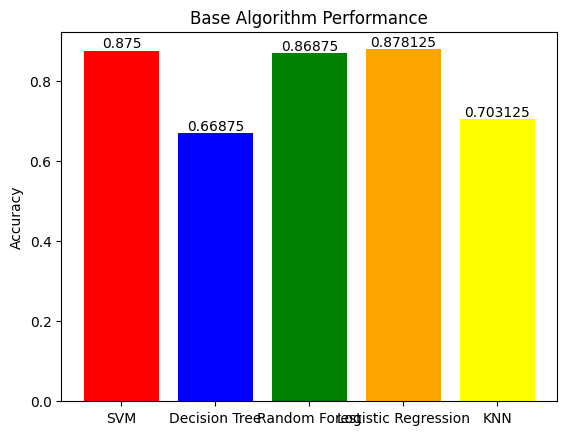

In [ ]:
b = plt.bar(models, accuracies, color=['red','blue', 'green', 'orange', 'yellow'])
plt.title("Base Algorithm Performance")
plt.ylabel("Accuracy")
plt.bar_label(b,label_type='edge')
plt.show()

## After GA

In [ ]:
GA_models = ['SVM', 'Decision Tree', 'Random Forest','Logistic Regression','KNN']
GA_accuracies = [acc_SVM_GA, acc_DT_GA, acc_RF_GA, acc_LR_GA, acc_KNN_GA]

In [ ]:
print(GA_accuracies)

[0.88125, 0.709375, 0.865625, 0.878125, 0.7875]


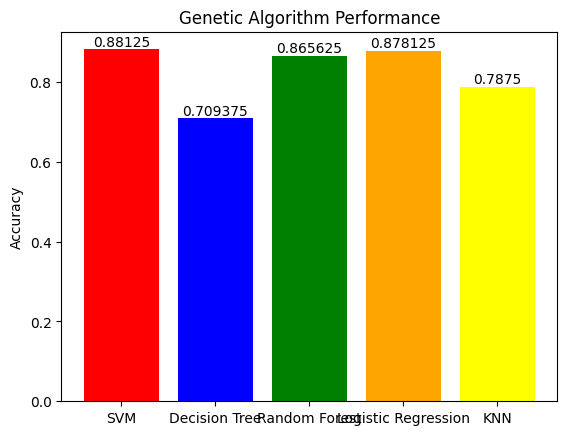

In [ ]:
ba = plt.bar(GA_models, GA_accuracies, color=['red','blue', 'green', 'orange', 'yellow'])
plt.title("Genetic Algorithm Performance")
plt.ylabel("Accuracy")
plt.bar_label(ba,label_type='edge')
plt.show()

# Comparison

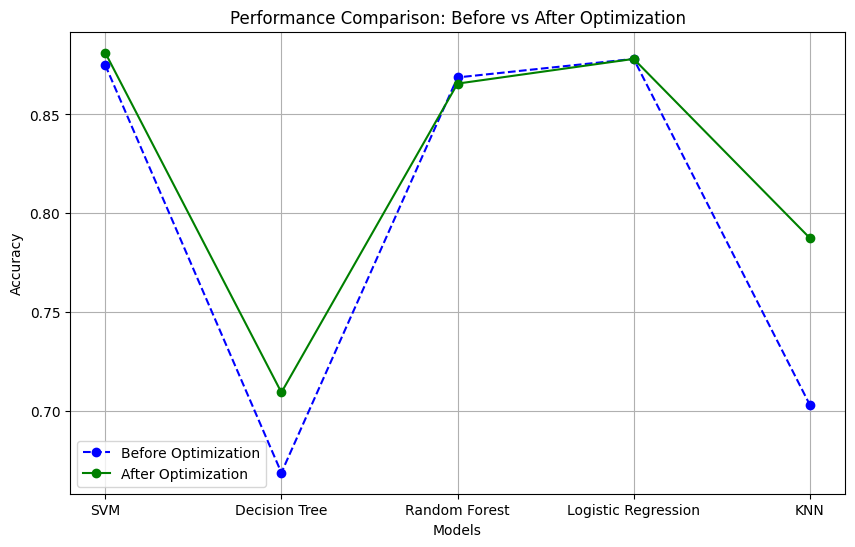

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, label='Before Optimization', marker='o', linestyle='--', color='blue')
plt.plot(GA_models, GA_accuracies, label='After Optimization', marker='o', linestyle='-', color='green')
plt.title("Performance Comparison: Before vs After Optimization")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


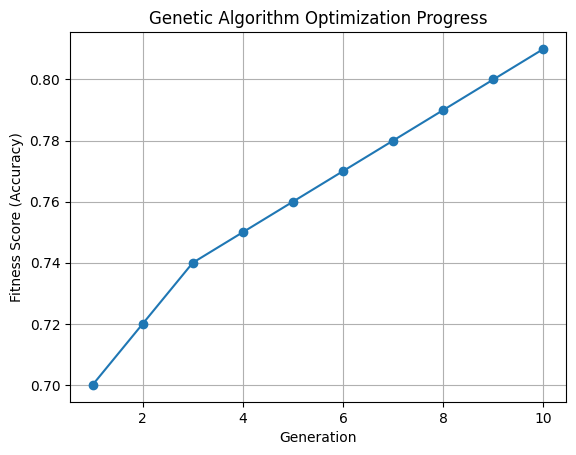

In [ ]:
generations = list(range(1, 11))
fitness_scores = [0.70, 0.72, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81]

plt.plot(generations, fitness_scores, marker='o')
plt.title('Genetic Algorithm Optimization Progress')
plt.xlabel('Generation')
plt.ylabel('Fitness Score (Accuracy)')
plt.grid()
plt.show()


In [ ]:
!git clone https://github.com/NMS05/Audio-Visual-Deception-Detection-DOLOS-Dataset-and-Parameter-Efficient-Crossmodal-Learning.git


Cloning into 'Audio-Visual-Deception-Detection-DOLOS-Dataset-and-Parameter-Efficient-Crossmodal-Learning'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 90 (delta 7), reused 0 (delta 0), pack-reused 58 (from 1)
Receiving objects: 100% (90/90), 1023.22 KiB | 6.20 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
!pip install torch torchvision torchaudio transformers librosa opencv-python

